In [1]:
import carla
import math
import random
import time
import numpy as np
import cv2
import matplotlib.pyplot as plt

import queue

from simple_carla_env import CarlaEnv

In [2]:
def loc2array(loc: carla.Location) -> np.ndarray:
    return np.array([loc.x, loc.y, loc.z])


In [3]:
env = CarlaEnv(n_exo_vehicles=0)
obs, info = env.reset()

spawned 0 exo vehicles


In [4]:
def get_highway_spawn_points():

    waypoints = env.map.generate_waypoints(30.0)
    highway_roads =  set([w.road_id for w in waypoints if w.lane_id == 3 and not w.is_junction])
    transforms = []
    for w in waypoints:
        if w.road_id in highway_roads:
            t = w.transform
            t.location.z = 0.1
            transforms.append(t)
    return transforms


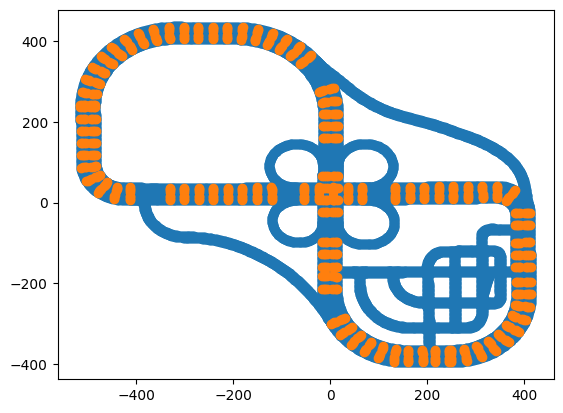

In [6]:
highway_roads = set([w.road_id for w in waypoints if w.lane_id == 3 and not w.is_junction])

waypoints = env.map.generate_waypoints(2.0)
f_locs = np.array([(w.transform.location.x, w.transform.location.y) for w in waypoints])

waypoints = env.map.generate_waypoints(30.0)
w_locs = np.array([(w.transform.location.x, w.transform.location.y) for w in waypoints if w.road_id in highway_roads])


plt.scatter(f_locs[:, 0], f_locs[:, 1])
plt.scatter(w_locs[:, 0], w_locs[:, 1])


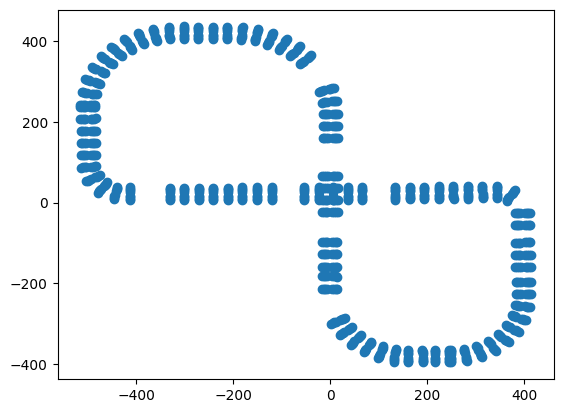

In [7]:
h_trans = get_highway_spawn_points()
h_locs = np.array([(h.location.x, h.location.y) for h in h_trans])
plt.scatter(h_locs[:, 0], h_locs[:, 1])

In [8]:

highway_roads =  set([w.road_id for w in waypoints if w.lane_id == 3 and not w.is_junction and not w.is_intersection])

highway_spawn_points = []
for sp in env.map.get_spawn_points():
    wp = env.map.get_waypoint(sp.location, project_to_road=True)
    if wp.road_id in highway_roads:
        highway_spawn_points.append(wp.transform)


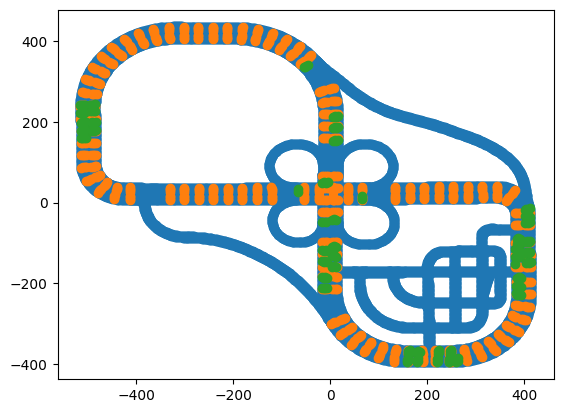

In [9]:
h_locs = np.array([(w.location.x, w.location.y) for w in highway_spawn_points])
plt.scatter(f_locs[:, 0], f_locs[:, 1])
plt.scatter(w_locs[:, 0], w_locs[:, 1])
plt.scatter(h_locs[:, 0], h_locs[:, 1])

In [10]:
np.array([(w.location.x, w.location.y, w.location.z) for w in highway_spawn_points])

array([[ 225.31356812, -364.12942505,    0.        ],
       [ 222.63372803, -367.64553833,    0.        ],
       [ 223.09185791, -385.14260864,    0.        ],
       [ 220.56248474, -388.66168213,    0.        ],
       [ 223.23295593, -392.14172363,    0.        ],
       [ 220.70359802, -395.66082764,    0.        ],
       [ 262.84823608, -384.79470825,    0.        ],
       [ 260.07424927, -388.48791504,    0.        ],
       [ 262.77279663, -391.81985474,    0.        ],
       [ 260.04180908, -395.50054932,    0.        ],
       [ 181.21687317, -367.95779419,    0.        ],
       [ 185.95393372, -371.42089844,    0.        ],
       [ 181.26940918, -374.95761108,    0.        ],
       [ 225.2484436 , -371.12966919,    0.        ],
       [ 222.59764099, -374.64602661,    0.        ],
       [ 385.68481445, -187.94570923,    0.        ],
       [ 389.15975952, -185.52960205,    0.        ],
       [ 392.68276978, -187.71333313,    0.        ],
       [ 386.10791016, -228.

In [11]:
dir(waypoints[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'get_junction',
 'get_landmarks',
 'get_landmarks_of_type',
 'get_left_lane',
 'get_right_lane',
 'id',
 'is_intersection',
 'is_junction',
 'junction_id',
 'lane_change',
 'lane_id',
 'lane_type',
 'lane_width',
 'left_lane_marking',
 'next',
 'next_until_lane_end',
 'previous',
 'previous_until_lane_start',
 'right_lane_marking',
 'road_id',
 's',
 'section_id',
 'transform']

In [12]:

for i in range(100):
    try:
        road_id = i #47
        lane_id = 1 
        # vehicle_s = np.random.uniform(road_length)  # length of road 47
        waypoint = env.map.get_waypoint_xodr(road_id, lane_id, 110)
        transform = waypoint.transform
        transform.location.z += 2
        # transform.rotation.pitch = -90
        env._set_spectator(transform)
        env.world.tick()

        print(road_id, lane_id, )
    except:
        pass

    # time.sleep(1.5)


31 1
33 1
34 1
35 1
38 1
39 1
40 1
41 1
44 1
45 1
46 1
47 1
50 1
51 1


In [ ]:
import math

def shortest_distance_to_line(a_point, line_point, line_vec):
    v_ap = a_point - line_point # Find a Vector from a_point to line_point
    proj_AP_v = (np.dot(v_ap, line_vec) / np.dot(line_vec, line_vec)) * line_vec # project v_ap onto line_vec
    distance = np.linalg.norm(v_ap - proj_AP_v)
    return distance

shortest_distance_to_line(v_loc, w_loc, w_vec)

def shortest_distance_to_line(point, line_point, line_direction):
    x_p, y_p = point
    x_a, y_a = line_point
    v_x, v_y = line_direction
    
    numerator = abs((x_p - x_a) * v_y - (y_p - y_a) * v_x)
    denominator = math.sqrt(v_x**2 + v_y**2)
    
    distance = numerator / denominator
    return distance

# Example usage
point = (4, 3)
line_point = (1, 1)
line_direction = (2, 1)

distance = shortest_distance_to_line(point, line_point, line_direction)
print("Shortest distance:", distance)

def shortest_distance_to_line(point, line_point, line_direction):
    x_p, y_p = point
    x_a, y_a = line_point
    v_x, v_y = line_direction
    
    # Vector from A to P
    AP_x = x_p - x_a
    AP_y = y_p - y_a
    
    # Projection of AP onto v
    dot_product = AP_x * v_x + AP_y * v_y
    v_squared = v_x**2 + v_y**2
    proj_AP_v_x = (dot_product / v_squared) * v_x
    proj_AP_v_y = (dot_product / v_squared) * v_y
    
    # Calculate the distance
    distance_x = AP_x - proj_AP_v_x
    distance_y = AP_y - proj_AP_v_y
    distance = math.sqrt(distance_x**2 + distance_y**2)
    
    return distance

# Example usage
point = (4, 3)
line_point = (1, 1)
line_direction = (2, 1)

distance = shortest_distance_to_line(point, line_point, line_direction)
print("Shortest distance:", distance)

def shortest_distance_to_line(point, line_point, line_direction):
    # x_p, y_p = point
    # x_a, y_a = line_point
    # v_x, v_y = line_direction
    
    # Vector from A to P
    ap =  point - line_point
    
    # Projection of AP onto v
    dot_product =  ap @ line_direction
    v_squared = line_direction @ line_direction
 
    proj_AP = (dot_product / v_squared) * line_direction

    # Calculate the distance
    distance = np.linalg.norm(ap - proj_AP)
  
    
    return distance

# Example usage
point = np.array([4, 3])
line_point = np.array([1, 1])
line_direction = np.array([2, 1])

distance = shortest_distance_to_line(point, line_point, line_direction)
print("Shortest distance:", distance)

def shortest_distance_to_line(a_point, line_point, line_vec):
    v_ap = a_point - line_point # Find a Vector from a_point to line_point
    proj_AP_v = (np.dot(v_ap, line_vec) / np.dot(line_vec, line_vec)) * line_vec # project v_ap onto line_vec
    distance = np.linalg.norm(v_ap - proj_AP_v)
    return distance

# Example usage
point = np.array([4, 3])
line_point = np.array([1, 1])
line_vec = np.array([2, 1])

shortest_distance_to_line(point, line_point, line_vec)